In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

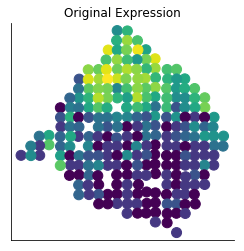

In [3]:
figsize(4, 4)
plt.scatter(sample_info.x, -sample_info.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Original Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-unshuff-example.pdf');

In [4]:
sample_info_shuffle = sample_info.copy()

In [5]:
tmp = sample_info.index.values.copy()
np.random.shuffle(tmp)
sample_info_shuffle['x'] = sample_info['x'][tmp].values
sample_info_shuffle['y'] = sample_info['y'][tmp].values

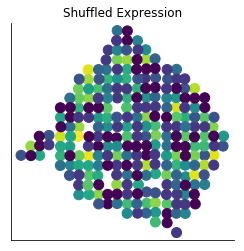

In [6]:
plt.scatter(sample_info_shuffle.x, -sample_info_shuffle.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Shuffled Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-shuff-example.pdf');

In [7]:
import NaiveDE

In [8]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info_shuffle, dfm.T, 'np.log(total_counts)').T

In [9]:
import SpatialDE

In [10]:
X = sample_info_shuffle[['x', 'y']]

In [11]:
shuffle_results = SpatialDE.run(X, res)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.081s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
 19%|█▉        | 2412/12856 [00:02<00:08, 1198.76it/s]/Users/vale/Documents/Research projects/Ongoing/spatial-gp/Python-module/SpatialDE/base.py:161: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)
INFO:root:Model 2 of 10                                
INFO:root:Model 3 of 10                               
INFO:root:Model 4 of 10                               
INFO:root:Model 5 of 10                               
INFO:root:Model 6 of 10                               
INFO:root:Model 7 of 10                               
INFO:root:Model 8 of 10                               
INFO:root:Model 9 of 10                               
INFO:root:Model 10 of 10                              


In [12]:
shuffle_results.query('qval < 0.05').shape

(6, 18)

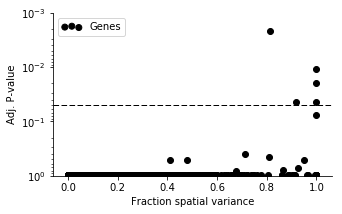

In [14]:
figsize(5, 3)

plt.yscale('log')
plt.scatter(shuffle_results.FSV, shuffle_results.qval, c='k', label='Genes', rasterized=True);
plt.ylim(1e-3, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');
plt.legend(scatterpoints=3);
plt.savefig('shuffled_BC_FSV_qval.pdf');

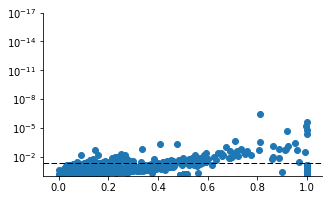

In [15]:
plt.yscale('log')
plt.scatter(shuffle_results.FSV, shuffle_results.pval);
plt.ylim(1e-17, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);

In [16]:
shuffle_results.sort_values('pval').head(10)

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
12294,0.999946,4,OPRL1,3.125663,0.000045,311.814578,0.411213,8.967680,SE,250,1.704074e-10,4.172033e-02,0.000526,-601.543312,55.293107,256.521470,0.000000e+00,0.000000
9964,0.810903,4,ITIH3,1.087806,0.228101,47.839043,-1.341460,0.353712,SE,250,1.378252e-03,5.775709e-02,0.000796,-73.592242,21.818474,26.020568,3.377993e-07,0.002171
9315,0.999954,4,CACNA1E,0.641736,0.000045,88.665038,-1.253480,0.710592,SE,250,2.910514e-03,1.011230e+06,0.000651,-155.244232,66.518629,22.146408,2.526282e-06,0.010826
12711,0.997857,4,ZFPL1,5.298311,0.001359,63.946475,0.328254,12.511646,SE,250,9.167378e-07,1.457701e-01,0.001277,-105.807105,43.472207,20.474268,6.043836e-06,0.019425
8406,0.999954,4,KCNQ1,0.641736,0.000045,121.493873,-1.435589,0.913282,SE,250,6.830757e-03,2.373281e+06,0.000910,-220.901902,103.102378,18.391495,1.798590e-05,0.043370
12608,0.917770,4,PRR7,5.298311,0.056678,-45.999563,-0.877006,1.106792,SE,250,1.876335e-03,2.792487e-01,0.000803,114.084970,-64.166017,18.166454,2.024130e-05,0.043370
9120,0.999954,4,INO80E,0.641736,0.000045,0.002102,-1.459070,0.986260,SE,250,1.666842e-02,5.791284e+06,0.001498,22.081640,-16.836139,16.838241,4.070475e-05,0.074757
11228,0.710283,4,SULT1A3,1.843940,0.381786,116.532083,-1.264833,0.145430,SE,250,6.272009e-03,1.605415e-01,0.000716,-210.978322,103.107956,13.424126,2.484087e-04,0.399193
8899,0.810804,4,GPSM1,0.641736,0.232029,28.180023,-1.317144,0.717056,SE,250,1.363191e-02,5.708661e-01,0.001097,-34.274202,15.179819,13.000204,3.114570e-04,0.444899
8979,0.949591,4,DNAJC24,0.641736,0.052786,14.654176,-1.608466,1.144546,SE,250,6.217535e-02,2.174347e+01,0.000950,-7.222508,2.080087,12.574089,3.911319e-04,0.502839


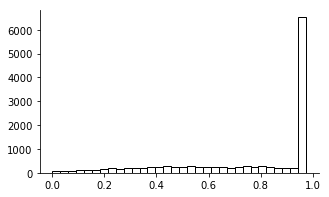

In [17]:
shuffle_results.pval.hist(bins=32, fc='w', ec='k', grid=False);

In [18]:
from scipy import stats

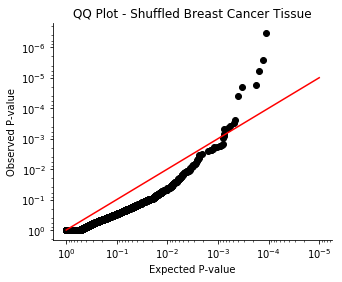

In [19]:
figsize(5, 4)

chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=shuffle_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(shuffle_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Shuffled Breast Cancer Tissue');
plt.savefig('shuffled_bc_qq_plot.pdf');